In [126]:
from scipy.optimize import curve_fit
from scipy.odr import ODR, Model, Data, RealData

In [127]:
import numpy as np
from matplotlib import pyplot as plt

def parse_file(file_name: str):
    lines = open(file_name, "r").readlines()
    lines = list(filter(lambda x: not x.startswith("#"), lines))
    data = list(map(lambda x: x.split(), lines))
    return data

def timestamp(row):
    return int(row[3])

def voltage(row):
    return float(row[6])

events = parse_file("data/data_muon/useable/10_degrees.txt")

def calc_counts(events, delta=60*60*1000):
    intervals = [[]]
    int_start = 0
    curr_interval = 0
    n_intervals = None
    i = 0
    while True:
        if i >= len(events):
            break
        event = events[i]
        if int(event[10]) == 0:
            i += 1
            continue
        if int_start < timestamp(event) < int_start + delta:
            intervals[-1].append(event)
        elif timestamp(event) > int_start + delta:
            curr_interval += 1
            if n_intervals is not None and curr_interval >= n_intervals:
                break
            intervals.append([])
            int_start += delta
            intervals[-1].append(event)

        i += 1

    counts = np.array(list(map(lambda x:  len(x), intervals)))
    return counts

def calc_counts_per_hour(filename):
    events = parse_file(filename)
    counts = calc_counts(events)
    return np.mean(counts)

counts = calc_counts(events)
print(counts)
print(np.std(counts))
print(np.mean(counts))
print(np.sum(counts))

[166 157 172 194 183 142 160 164 185 174 166 114]
20.24073862288627
164.75
1977


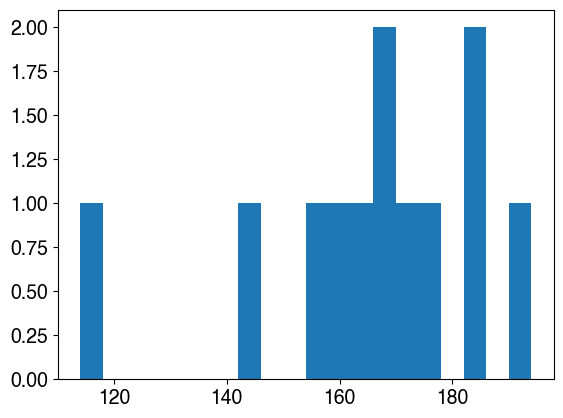

In [128]:
plt.hist(counts, bins=20)
plt.savefig("hist.png")


[166.0, 161.5, 165.0, 172.25, 174.4, 169.0, 167.71428571428572, 167.25, 169.22222222222223, 169.7, 169.36363636363637, 164.75]


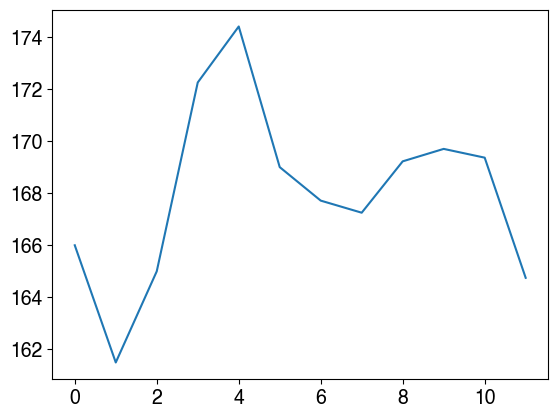

In [129]:
avg = 0
n = 0
running_avgs = []
for i in range(len(counts)):
    avg += counts[i]
    n += 1
    running_avgs.append(avg / n)

print(running_avgs)

plt.plot(running_avgs)
plt.savefig("avg.png")

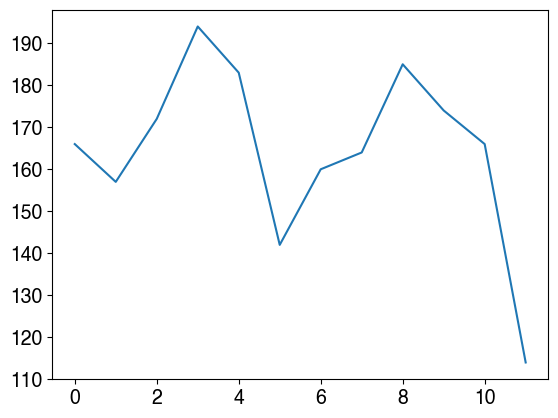

In [130]:
plt.plot(np.arange(counts.size), counts)

[9.0378878  1.69120662]
output [9.03788788 1.69120657]
CHI@= 0.14


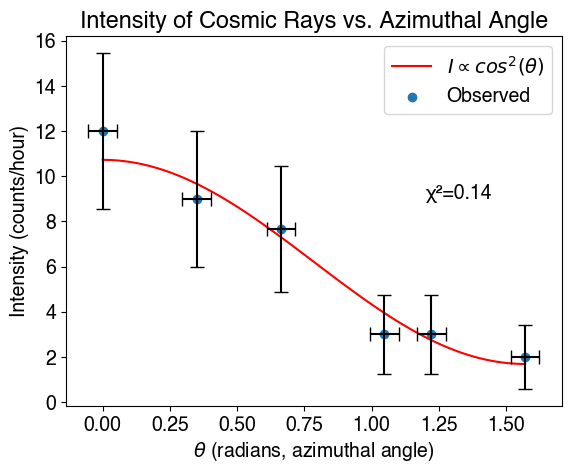

[0.84560329 0.56373552 0.56373552 0.22059216 0.18791184 0.14093388]


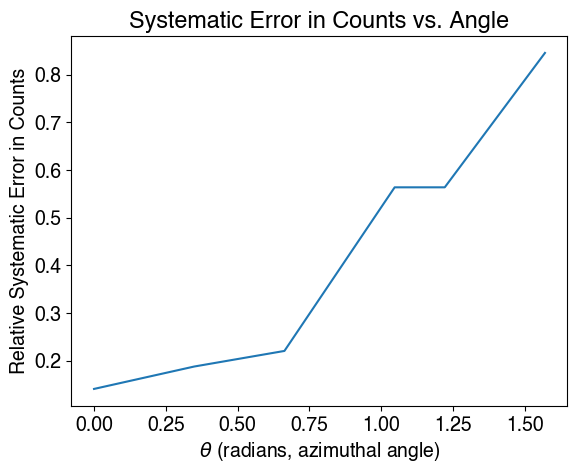

In [135]:
import os

x = []
y = []
ns = [0, 20, 30, 52, 70, 90]
for n in ns:
    filename = f"data/data_muon/try_again/{n}_re.txt"
    y.append(calc_counts_per_hour(filename))
    x.append(n / 180 * np.pi)

# OLD DATA
# y = []
# x = []
# for i in range(10, 100, 10):
#     filename = f"data/data_muon/useable/{i}_degrees.txt"
#     if not os.path.exists(filename):
#         continue
#     y.append(calc_counts_per_hour(filename))
#     x.append(i / 180 * np.pi)

# # New data (middle)
# x = []
# y = []
# ns = [0, 22, 40, 55, 65, 80, 90]
# for n in ns:
#     filename = f"data/data_muon/angles_redone/{n}_degrees.txt"
#     y.append(calc_counts_per_hour(filename))
#     x.append(n / 180 * np.pi)

y = np.array(y)
x = np.pi/2. - np.array(x)
sigma_y = np.sqrt(y)

def func(x, a, b):
    return a*np.cos(x)**2 + b

# NORMAL LEAST SQUARES
popt, pcov = curve_fit(f=func, xdata=x, ydata=y, sigma=sigma_y, p0=[1, 1], absolute_sigma=True)
sigma_fit = np.sqrt(np.diag(pcov))
# chi2 = np.sum((y - func(output.beta, x))**2 / sigma_y**2) / 7.
print(popt)
# TOTAL LEAST SQUARES
X_ERR = 3.044/180*np.pi # 59./180*np.pi


def func(beta, x):
    return beta[0]*np.cos(x)**2 + beta[1]
data = RealData(x, y, X_ERR, sigma_y)
model = Model(func)
odr = ODR(data, model, beta0=[863.,1500.])
odr.set_job(fit_type=2)
output = odr.run()
print('output', output.beta)
chi2 = round(output.res_var, 2)
print("CHI@=", chi2)

x_continuous = np.linspace(x[0], x[-1], 100)

plt.annotate("\u03C7\u00b2=" + str(round(chi2, 2)), (1.2, 9), color="black")

plt.rcParams.update({'font.size': 14, 'font.family': 'Helvetica'})

plt.plot(x_continuous, func(output.beta, x_continuous), color="red")
plt.scatter(x, y)
plt.errorbar(x, y, yerr=sigma_y, xerr=X_ERR, color="black", capsize=5, capthick=1, fmt="none")
plt.xlabel("$\\theta$ (radians, azimuthal angle)")
plt.ylabel("Intensity (counts/hour)")
plt.title("Intensity of Cosmic Rays vs. Azimuthal Angle")
plt.legend(["$I \\propto cos^2(\\theta)$", "Observed"])

plt.savefig("angles.pdf", bbox_inches="tight", pad_inches=0.1)
# plt.show()
plt.show()


plt.title("Systematic Error in Counts vs. Angle")
plt.xlabel("$\\theta$ (radians, azimuthal angle)")
plt.ylabel("Relative Systematic Error in Counts")
plt.plot(x, output.beta[1] / y)
print(output.beta[1] / y)
plt.savefig("error.pdf", bbox_inches="tight", pad_inches=0.1)

In [132]:
data = [
    69
]

time = [
    13.0
]

72/0.23=317.26
1/0 = 0.07309644670050762
56/0.18=315.52
1/0 = 0.08846761453396525
57/0.17=332.85
1/0 = 0.10401459854014598
81/0.23=351.76
1/0 = 0.10602094240837696
62/0.17=361.21
1/0 = 0.09523809523809523
68/0.18=383.22
1/0 = 0.09340659340659341
chi2 0.0743072721068881
[-0.0094951   0.00223108  0.01413309  0.01127946 -0.00193338 -0.00983985]
[0.07309644670050762, 0.08846761453396525, 0.10401459854014598, 0.10602094240837696, 0.09523809523809523, 0.09340659340659341]
0.0005226655604830186
[0.03186265 0.03974643 0.04271788 0.03617873 0.03919309 0.03706247]


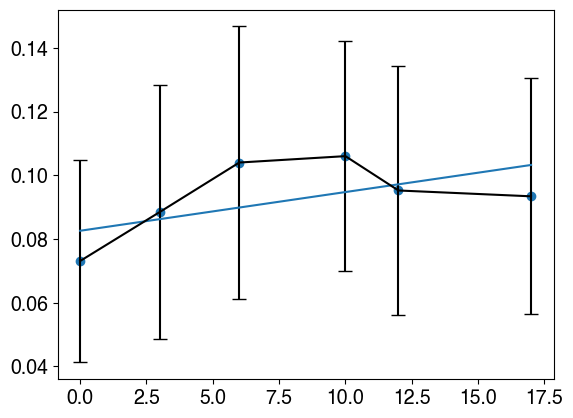

In [133]:
floors = [
    0,
    3,
    6,
    10,
    12,
    17

]
files = [
    54,
    55,
    56,
    57,
    58,
    59
]

def get_time(events):
    return (timestamp(events[-1]) - timestamp(events[0])) / 1000 / 60 / 60

def get_coincident_counts(events):
    return len(list(filter(lambda x: int(x[10]) == 1, events)))

def get_total_counts(events):
    return len(events)

def plot_voltage_hist_for_floor(floor, file):
    filename = f"data/gb/FileC0{file}.txt"
    events = parse_file(filename)[:500]
    events = list(filter(lambda e: timestamp(e) < 143167, events))


    voltages = list(map(lambda x: voltage(x), events))
    plt.hist(voltages, bins=10)
    plt.savefig(f"hist_{floor}.png")

y = []
sigma_y = []
for i in range(len(files)):
    filename = f"data/gb/FileC0{files[i]}.txt"
    if not os.path.exists(filename):
        continue
    events = parse_file(filename)
    time = get_time(events)
    counts = get_coincident_counts(events)
    print(f"{counts}/{round(time, 2)}={round(counts/time, 2)}")
    y_i = get_coincident_counts(events)/get_total_counts(events)
    print(f"1/0 = {y_i}")
    y.append(y_i)
    sigma_y.append(1./np.sqrt(get_total_counts(events)))

x = np.array(floors[:len(y)])
sigma_y = np.array(sigma_y)

def line(x, m, b):
    return m * x + b

popt, pcov = curve_fit(f=line, xdata=x, ydata=y, sigma=sigma_y, p0=[1, 1], absolute_sigma=True)
sigma_fit = np.sqrt(np.diag(pcov))

chi2 = np.sum((y - line(x, *popt))**2 / np.square(sigma_y)) / 5.0
print('chi2', chi2)
print(y - line(x, *popt))
print(y)
print(np.sum((y - line(x, *popt))**2))
print(sigma_y)

plt.errorbar(x, y, yerr=sigma_y, color="black", capsize=5, capthick=1)
plt.scatter(x, y)
plt.plot(x, line(x, *popt))

# This data is fine enough. CHi2 value is decent.

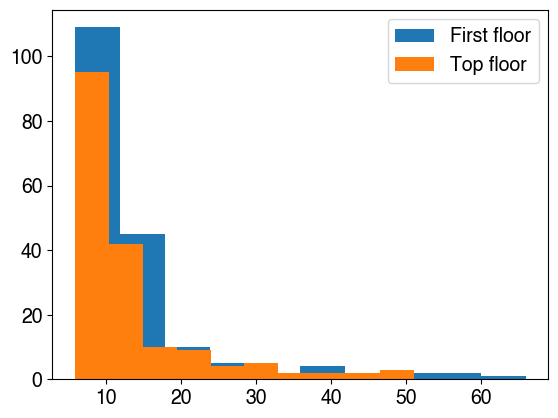

In [134]:
# for i in range(len(files)):
#     plot_voltage_hist_for_floor(floors[i], files[i])
#     plt.show()
i = -1
plot_voltage_hist_for_floor(floors[i], files[i])
# plt.show()
i = 0
plot_voltage_hist_for_floor(floors[i], files[i])
plt.legend(["First floor", "Top floor"])
plt.show()